In [49]:
from matplotlib import pyplot as plt 
import pandas as pd 
import seaborn as sns
import numpy as np

In [50]:
# This dataset is too large to include in this GitHub
# To run this code, because download the CSV file from:
# https://www.kaggle.com/des137/us-births-2018

df = pd.read_csv("US_Births.csv")

In [51]:
# Using the CDC's 2018 Natality Public Use File Documentation:
# ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/DVS/natality/UserGuide2018-508.pdf

# remove the values that correspond to NaN for father's education
df = df[df.FEDUC != 9]
df = df[df.FEDUC != 0]

# remove the values that correspond to NaN for mother's education
df = df[df.MEDUC != 9]
df = df[df.MEDUC != 0]

# remove the values that correspond to NaN for birth weight
df = df[df.DBWT != 9999]

In [52]:
father_education = df["FEDUC"]
mother_education = df["MEDUC"]
birth_weight = df["DBWT"]

In [53]:
table = df.pivot_table(index="FEDUC", columns="MEDUC",values="DBWT")

In [54]:
positions = np.arange(1,9)
positions
labels = ("N/A",
"HS-",  
"HS",  
"AA-",
"AA", 
"BA", 
"MA", 
"PhD")

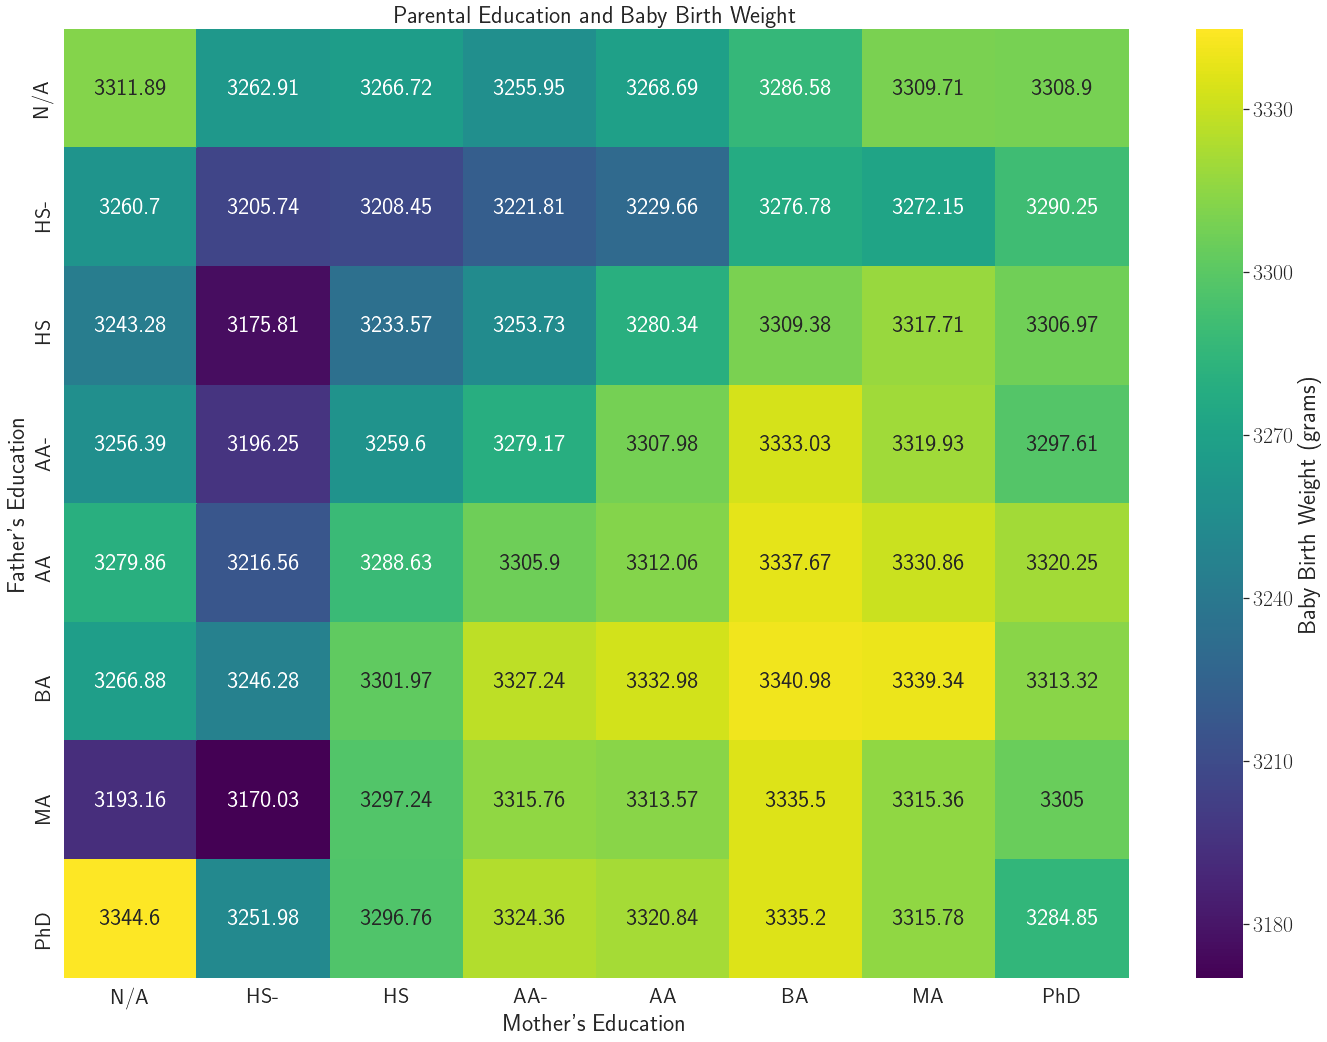

In [56]:
plt.rc('text', usetex=True)

sns.set(font_scale=2)
plt.subplots(figsize=(20,15))
sns.heatmap(table, annot=True, fmt="g", cmap='viridis', cbar_kws={'label': 'Baby Birth Weight (grams)'})

plt.xticks(positions -0.5, labels)
plt.yticks(positions -0.5, labels)

plt.xlabel("Mother's Education", fontsize="medium")
plt.ylabel("Father's Education", fontsize="medium")
plt.title("Parental Education and Baby Birth Weight")
plt.tight_layout()
plt.savefig("US_Births.png", bbox_inches="tight", dpi=400)

